In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

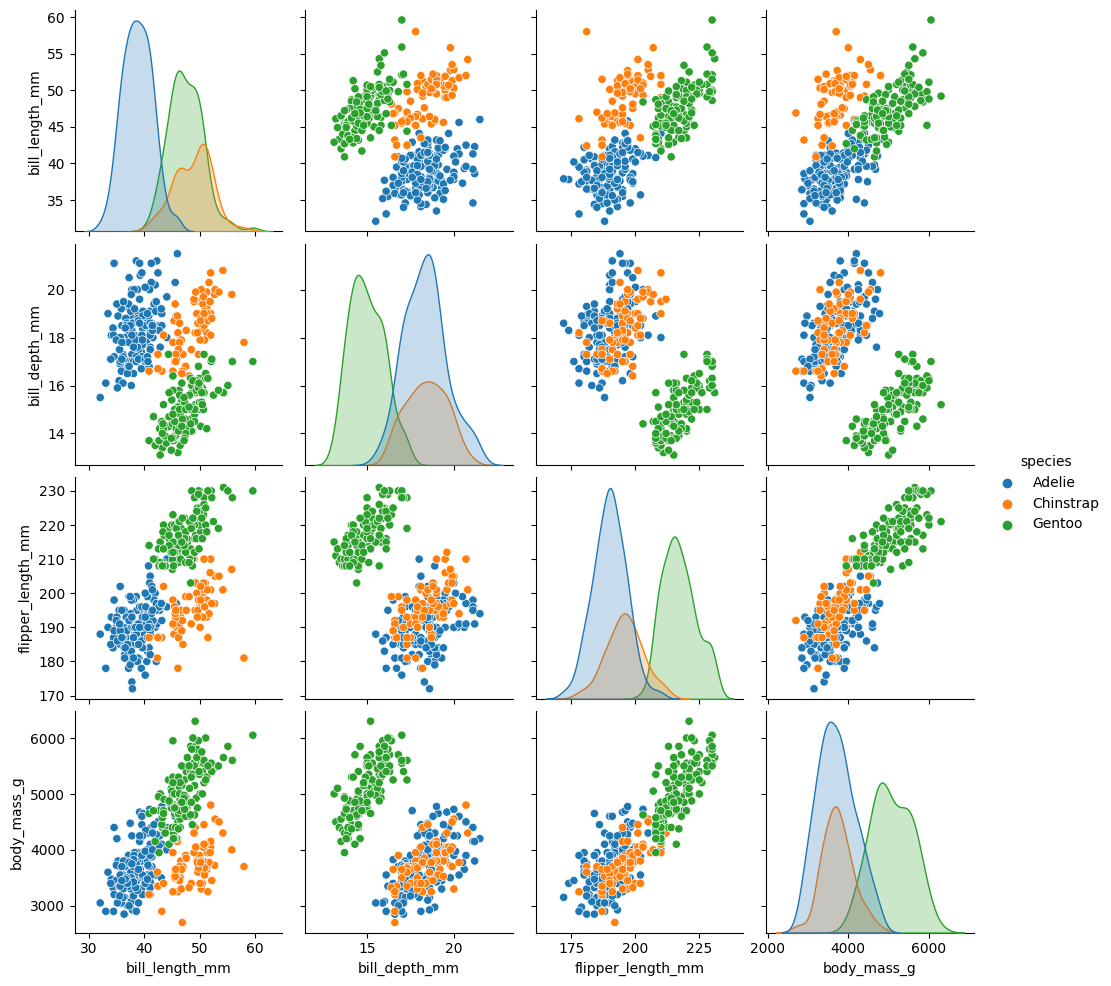

In [15]:
sns.pairplot(df, hue='species')

<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

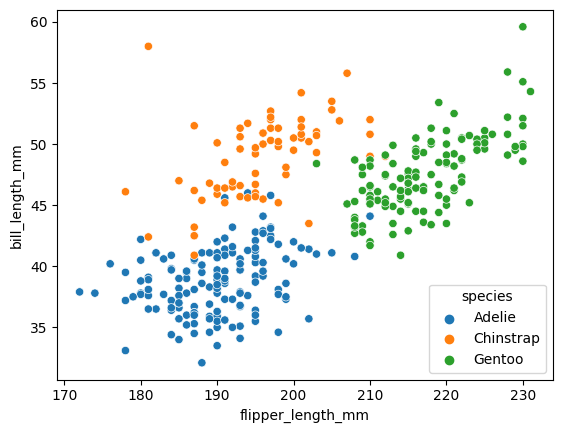

In [19]:
sns.scatterplot(x=df['flipper_length_mm'], y=df['bill_length_mm'], hue=df['species'])

Selecting 'Flipper Length' and 'Bill Length' for training...

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
y = df['species'].copy()

In [27]:
y.isnull().sum()

0

In [24]:
x = df.drop(['species','bill_depth_mm','body_mass_g','sex','island'], axis=1).copy()

In [25]:
x.head()

bill_length_mm  flipper_length_mm
0            39.1              181.0
1            39.5              186.0
2            40.3              195.0
3             NaN                NaN
4            36.7              193.0

In [26]:
x.isnull().sum()

bill_length_mm       2
flipper_length_mm    2
dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
xtmp = imputer.fit_transform(x)

scaler = StandardScaler()
x_processed = scaler.fit_transform(xtmp)

<Axes: >

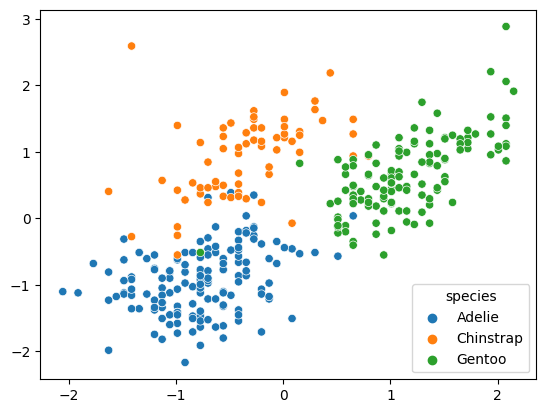

In [44]:
sns.scatterplot(y=x_processed[:,0], x=x_processed[:,1], hue=df['species'])

<hr>

### Preprocessing

In [47]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

In [49]:
X = df.drop(['species'], axis=1).copy()

In [60]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [55]:
num_cols = X.columns[X.dtypes != 'object']
cat_cols = X.columns[X.dtypes == 'object']


In [56]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('oneHot', OneHotEncoder(sparse_output=False))
])

preprocessing_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
])

In [57]:
X_processed = preprocessing_pipeline.fit_transform(X)

In [66]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=0)

<hr>

### Model Training

K-Means clustering

In [70]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, random_state=0)

kmean.fit(X_train)

KMeans(n_clusters=3, random_state=0)

In [71]:
pred = kmean.predict(X_test)

In [80]:
pred[:10]

array([2, 1, 0, 2, 2, 2, 0, 0, 2, 1])

In [79]:
y_test[:10]

77        Adelie
334       Gentoo
43        Adelie
135       Adelie
125       Adelie
148       Adelie
111       Adelie
170    Chinstrap
132       Adelie
240       Gentoo
Name: species, dtype: object

Gentoo = 1
Adelie = 2
Chinstrap = 0

In [81]:
X_train_df = pd.DataFrame(X_train)

In [83]:
kmean.labels_

array([2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,
       2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 1, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0,
       0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1,
       2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2])

In [87]:
X_train_df['labels'] = kmean.labels_

d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

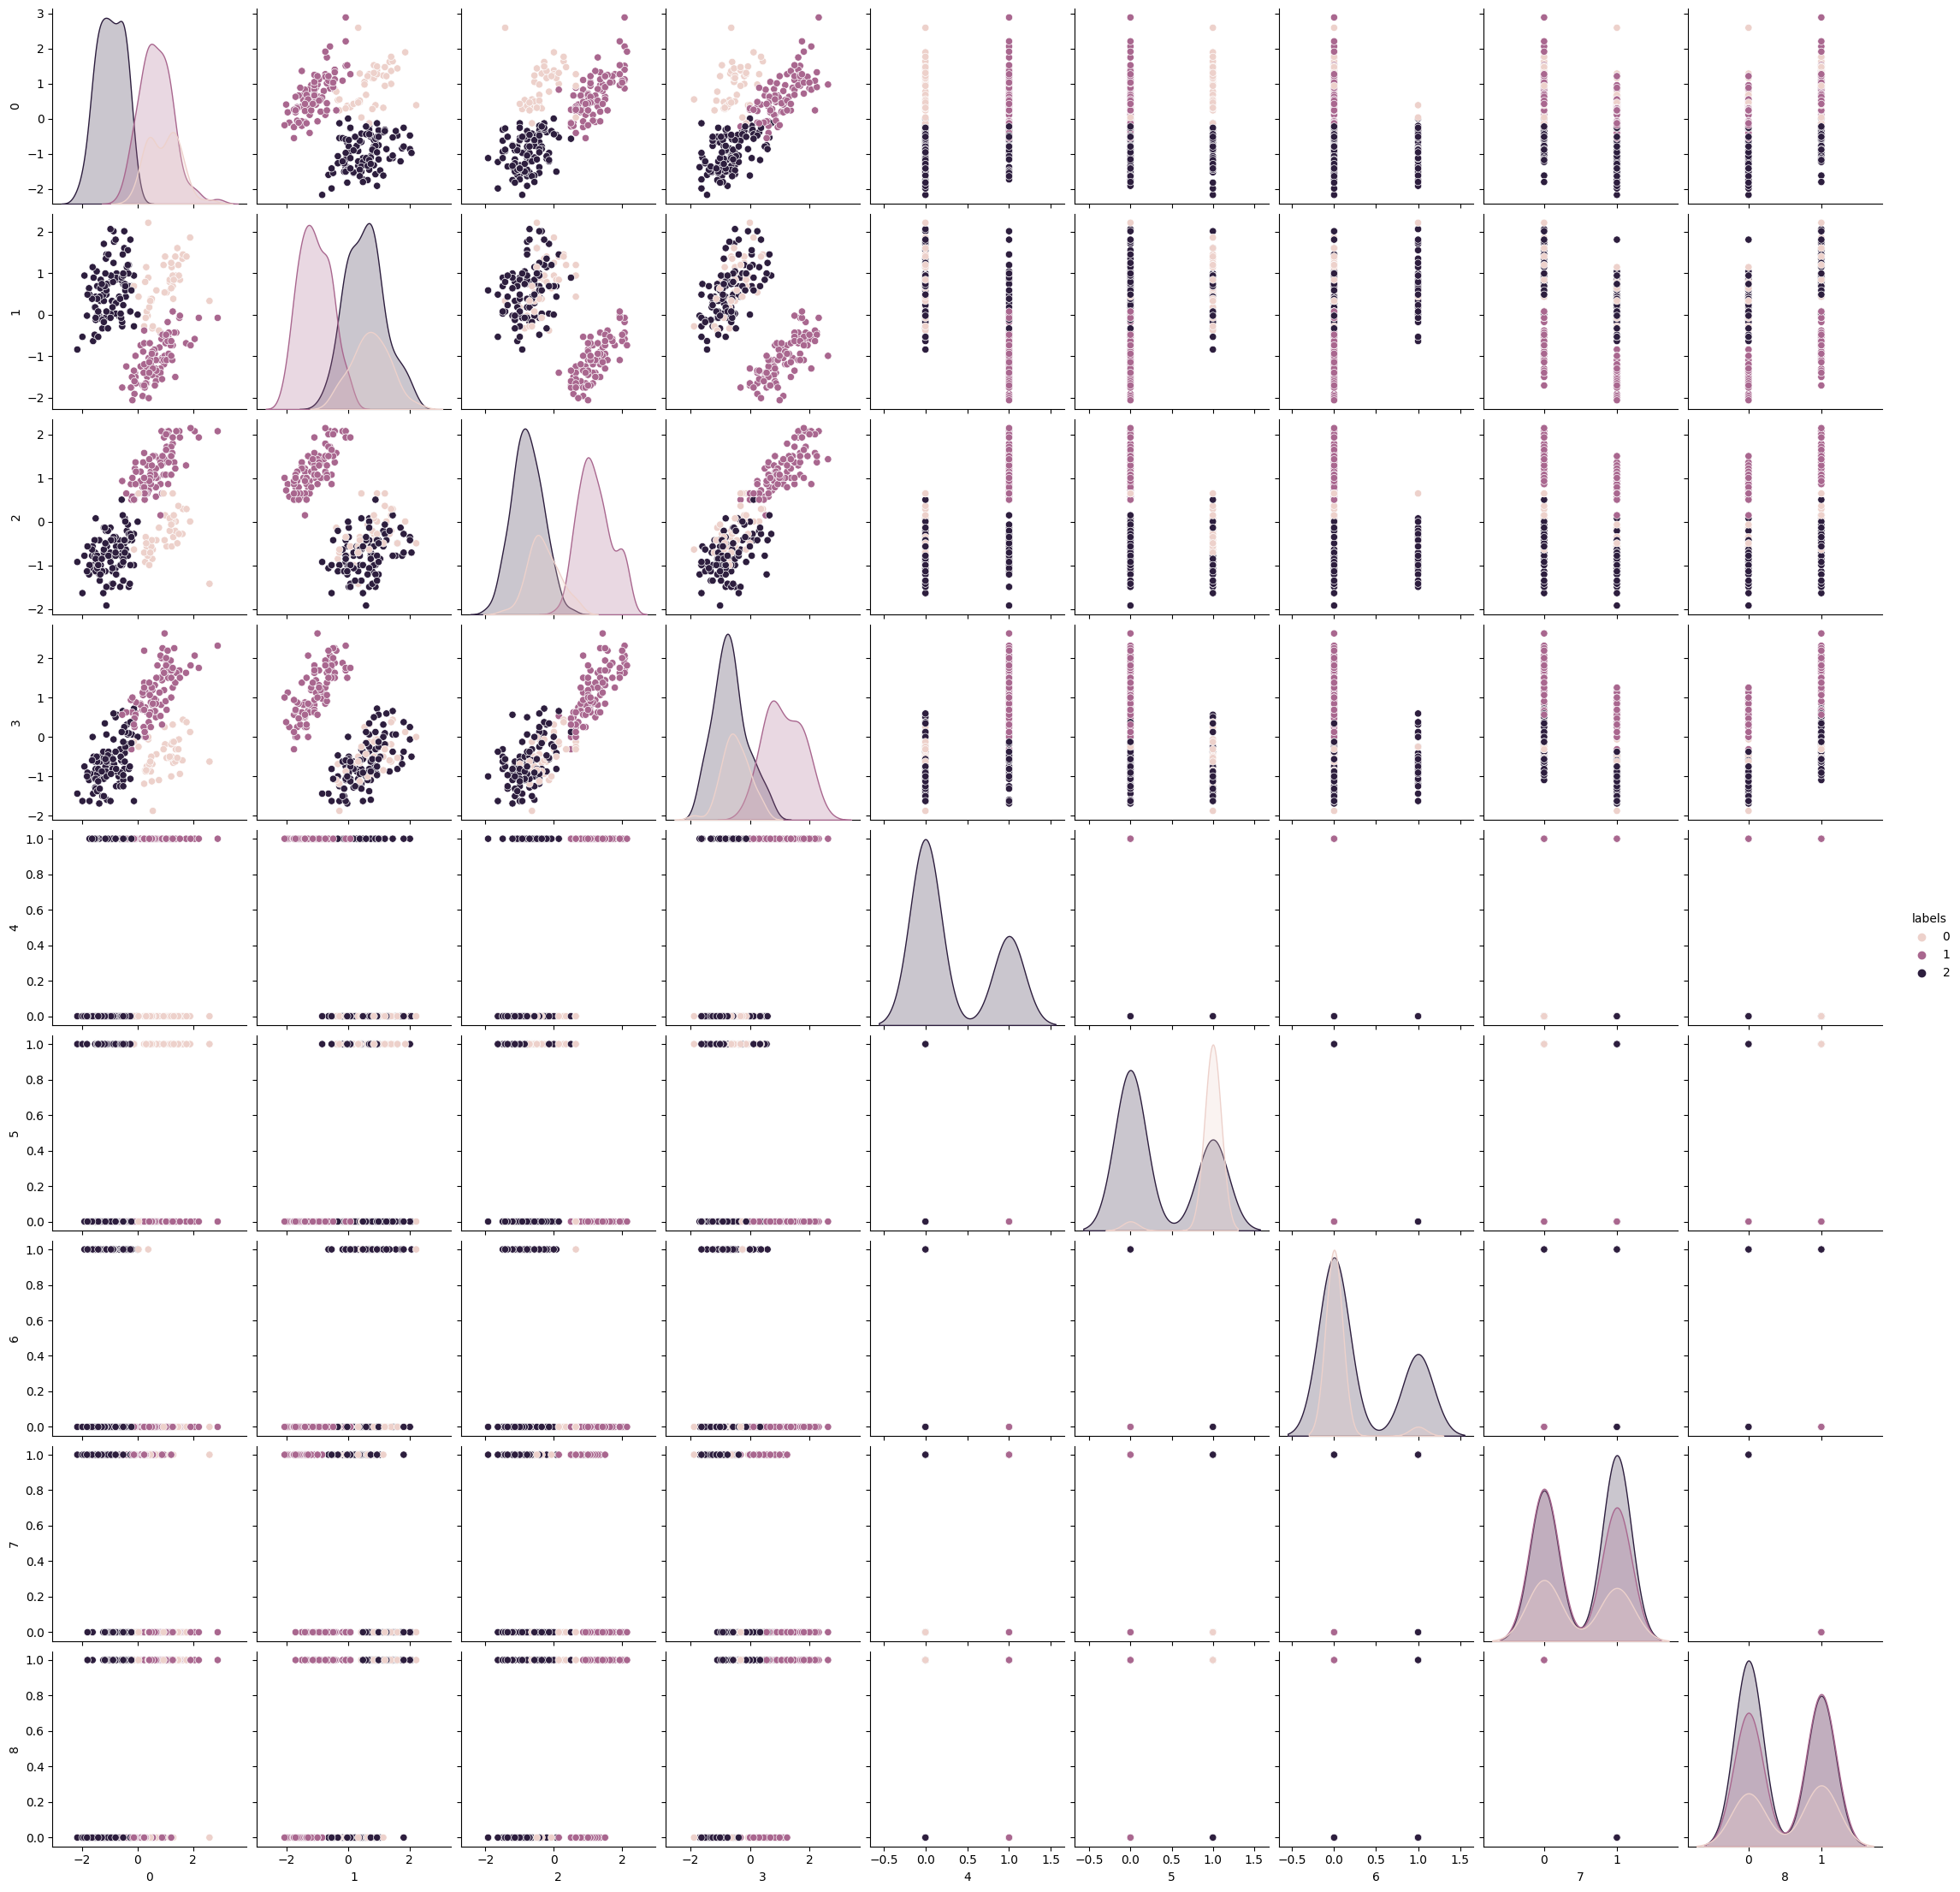

In [89]:
sns.pairplot(X_train_df, hue='labels', palette="deep")

2 and 0 looks promising

<Axes: >

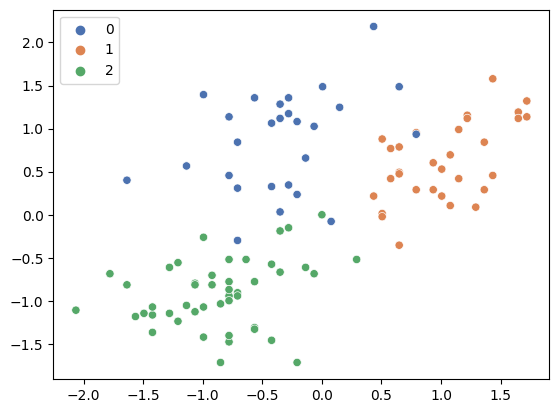

In [106]:
sns.scatterplot(x=X_test[:,2], y=X_test[:,0], hue=pred, palette="deep")

<Axes: >

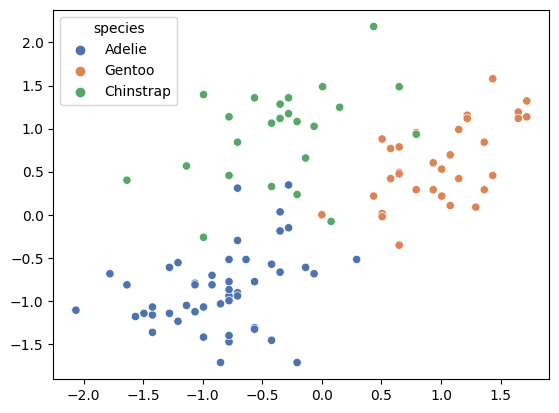

In [107]:
sns.scatterplot(x=X_test[:,2], y=X_test[:,0], hue=y_test, palette="deep")

In [120]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [122]:
silhouette = silhouette_score(X_train, kmean.labels_)
db_index = davies_bouldin_score(X_train, kmean.labels_)
ch_index = calinski_harabasz_score(X_train, kmean.labels_)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Silhouette Score: 0.39
Davies-Bouldin Index: 1.12
Calinski-Harabasz Index: 196.63


<hr>

Agglomerative Clustering.



In [98]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)


AgglomerativeClustering(n_clusters=3)

In [99]:
pred_agglo = agglo.fit_predict(X_train)

In [100]:
pred_agglo

array([1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1,
       2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0,
       0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2,
       2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0,
       1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1],
      dtype=int64)

d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

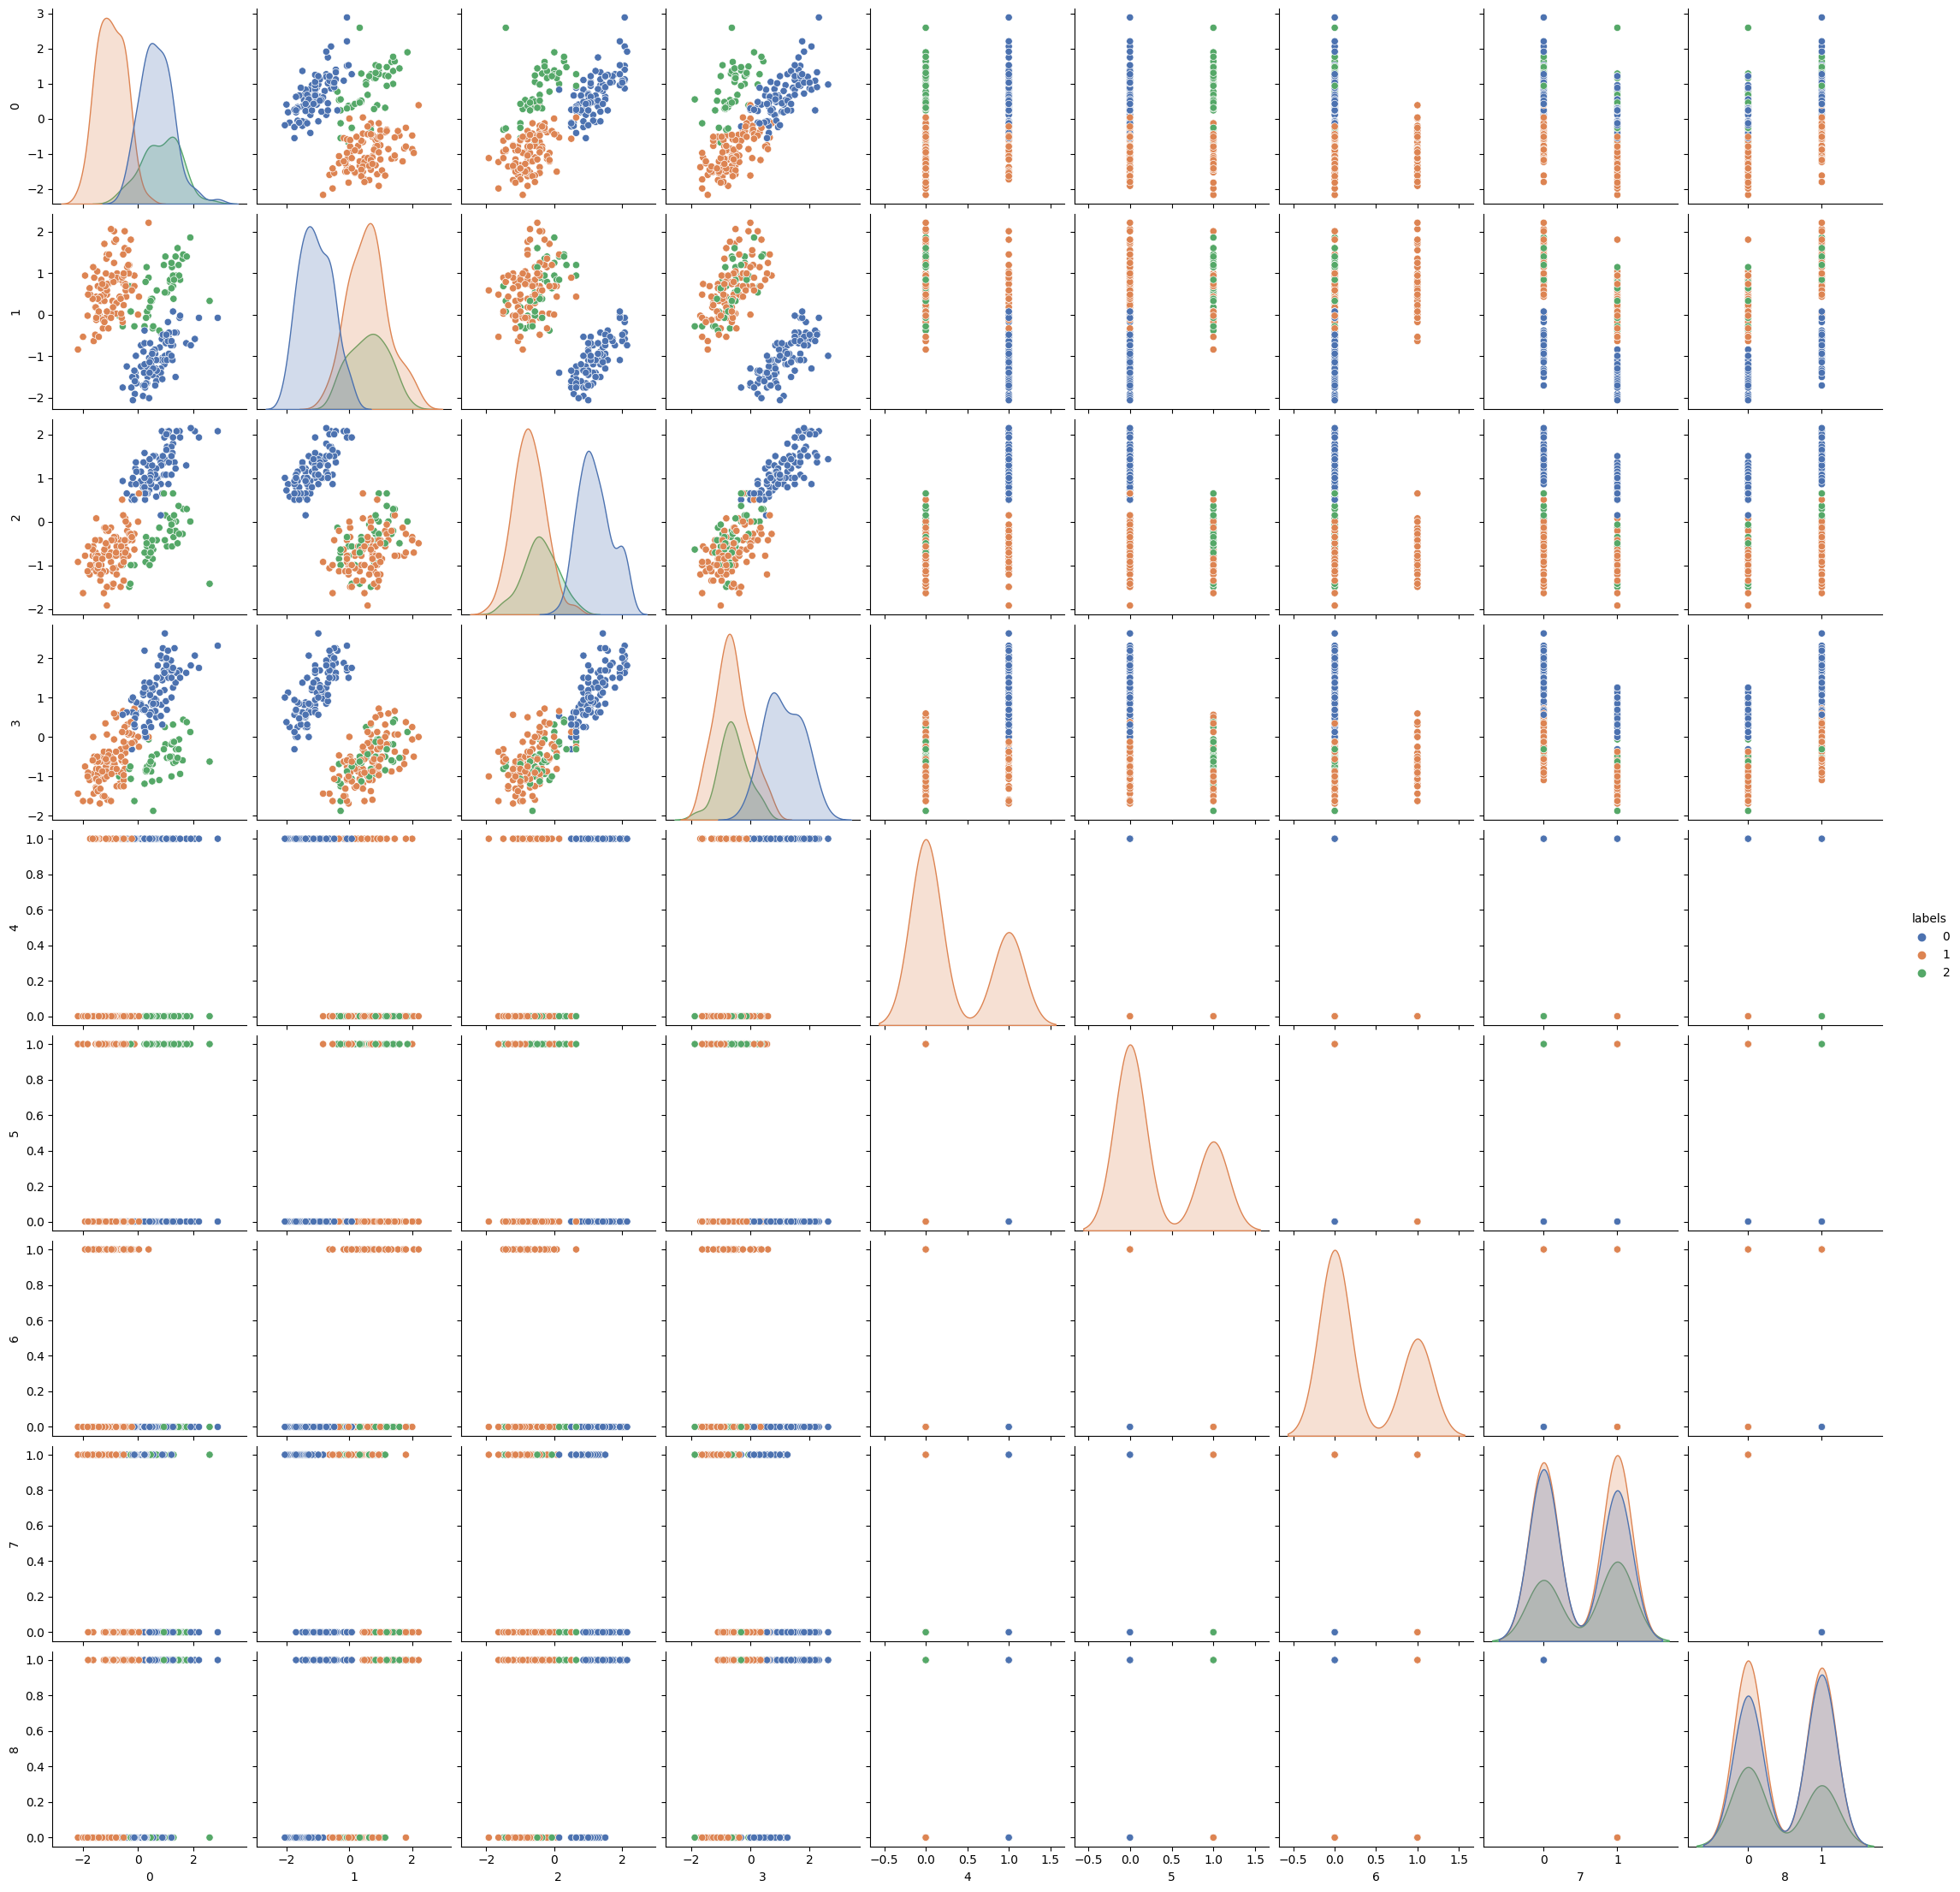

In [102]:
X_train_df['labels'] = agglo.labels_
sns.pairplot(X_train_df, hue='labels', palette="deep")

<Axes: >

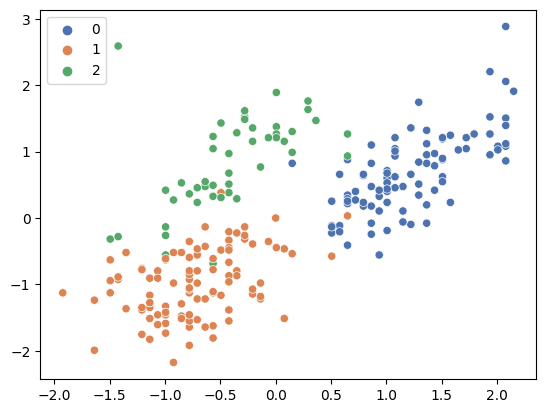

In [103]:
sns.scatterplot(x=X_train[:,2], y=X_train[:,0], hue=agglo.labels_, palette="deep")

<Axes: >

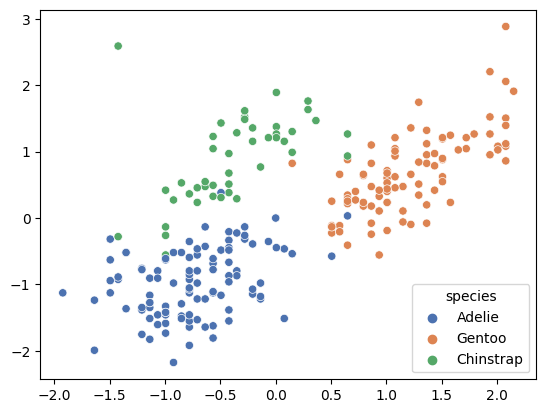

In [104]:
sns.scatterplot(x=X_train[:,2], y=X_train[:,0], hue=y_train, palette="deep")

In [123]:
silhouette = silhouette_score(X_train, agglo.labels_)
db_index = davies_bouldin_score(X_train, agglo.labels_)
ch_index = calinski_harabasz_score(X_train, agglo.labels_)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.38
Davies-Bouldin Index: 1.19
Calinski-Harabasz Index: 190.88


DBSCAN - Density-Based Spatial Clustering of Applications with Noise

In [108]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN()

dbsc.fit(X_train)

DBSCAN()

In [112]:
dbsc.fit_predict(X_train)

d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ml-assignments\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

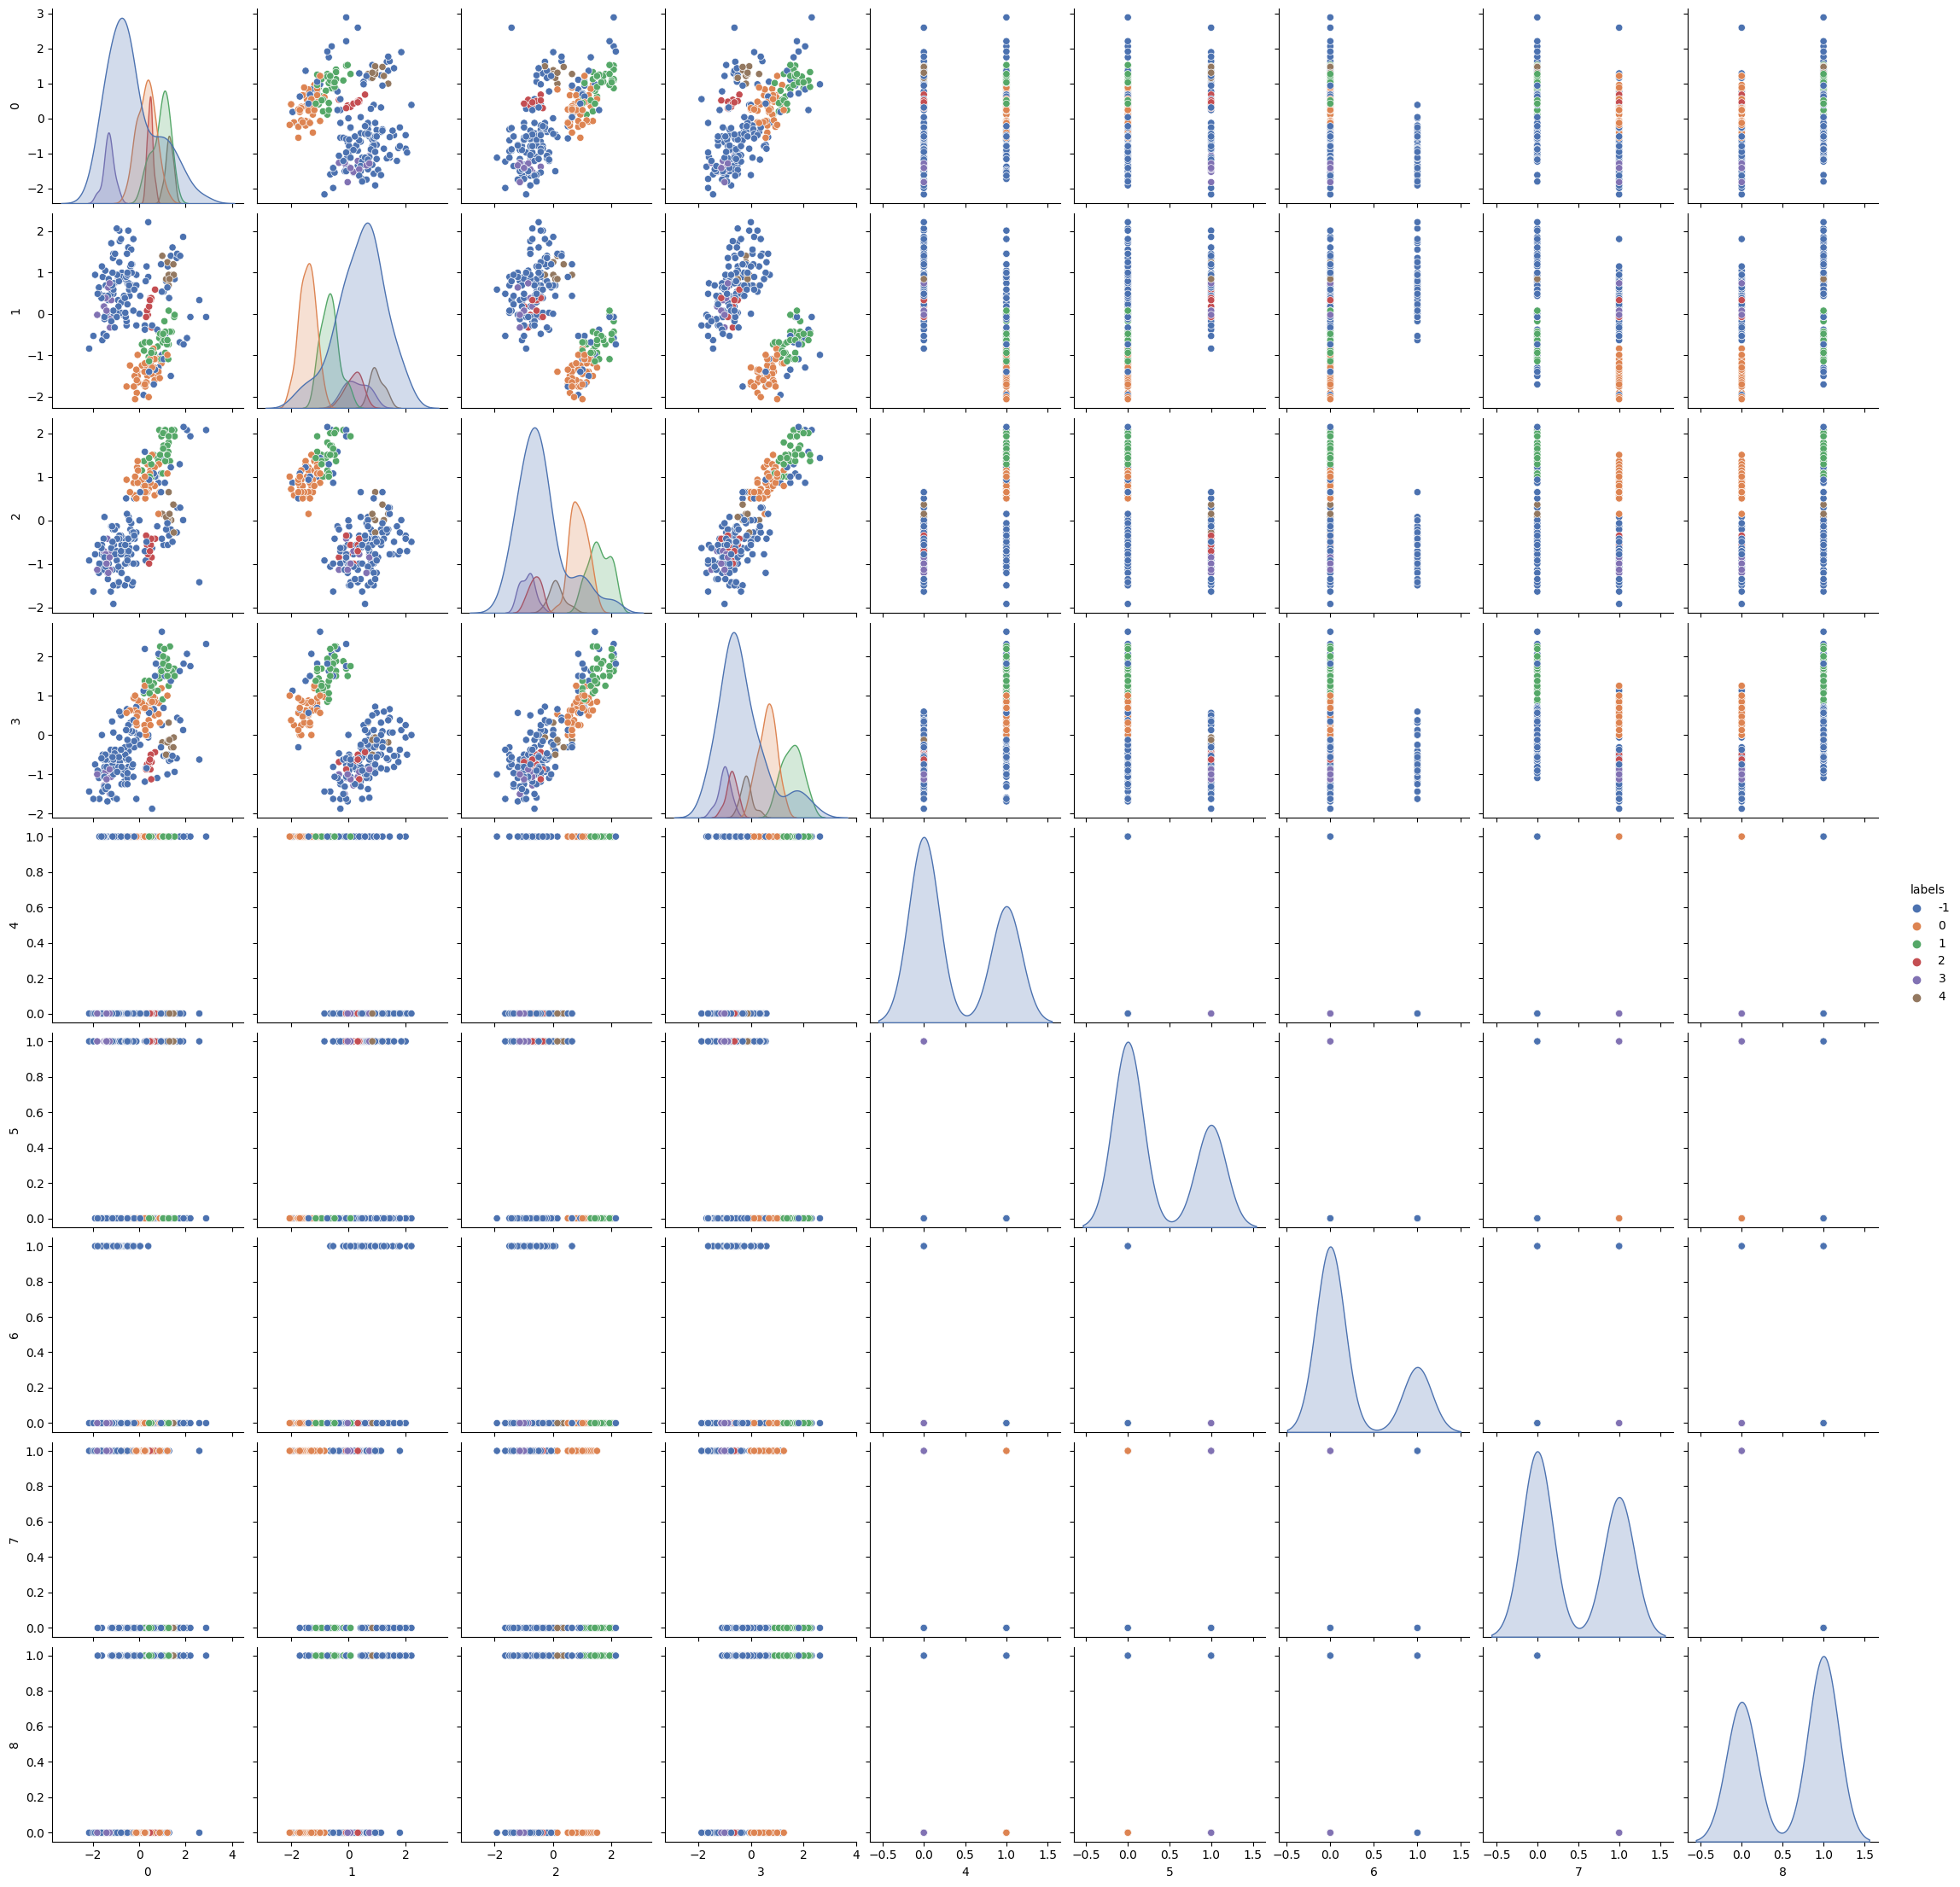

In [113]:
X_train_df['labels'] = dbsc.labels_
sns.pairplot(X_train_df, hue='labels', palette="deep")

<Axes: >

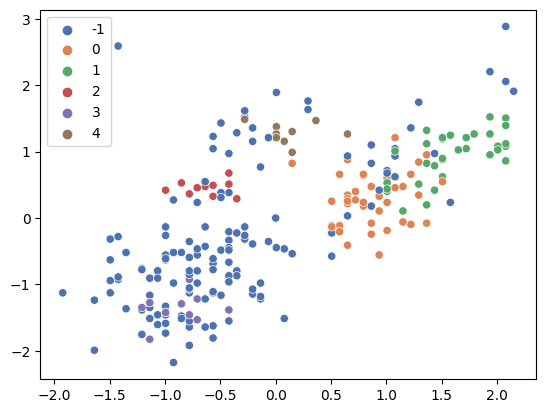

In [118]:
sns.scatterplot(x=X_train[:,2], y=X_train[:,0], hue=dbsc.labels_, palette="deep")


<Axes: >

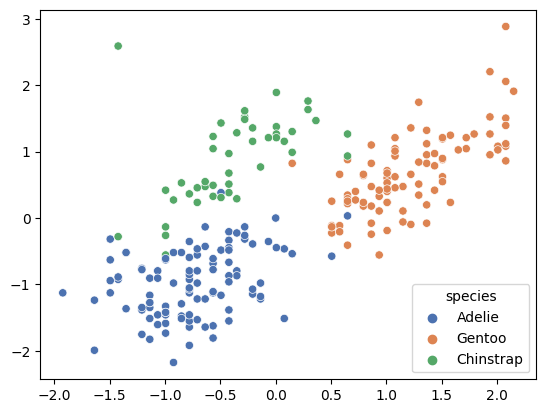

In [119]:

sns.scatterplot(x=X_train[:,2], y=X_train[:,0], hue=y_train, palette="deep")

In [124]:
silhouette = silhouette_score(X_train, dbsc.labels_)
db_index = davies_bouldin_score(X_train, dbsc.labels_)
ch_index = calinski_harabasz_score(X_train, dbsc.labels_)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.06
Davies-Bouldin Index: 1.26
Calinski-Harabasz Index: 42.89
